Crindo  uma aapresentação execultiva
 estou ultilizando uma base de vendas do  kagggle:
 https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting 
 o que queremos responder.
 1-como foi  venda nesse periodo?
 2-qual  foi a caategoria mis vendida?
 3-qual foi o item mais vendido?                                                                                                                                        
 

In [1]:
import pandas as pd
base = pd.read_csv(r"Apresentaçao execultiva.csv")

/home/kira/anaconda3/lib/python3.7/site-packages/setuptools/_importlib.py:42: SetuptoolsWarning: Incompatibility problem.
!!

        ********************************************************************************
        `importlib-metadata` version is incompatible with `setuptools`.
        This problem is likely to be solved by installing an updated version of
        `importlib-metadata`.

        See https://github.com/python/importlib_metadata/issues/396 for details.
        ********************************************************************************

!!
  disable_importlib_metadata_finder(metadata)


primeira coisa que eu faço é tratar os dados , ver se  tem algum valor nulo, e corrigir isso.

In [2]:
base.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
Row ID           9800 non-null int64
Order ID         9800 non-null object
Order Date       9800 non-null object
Ship Date        9800 non-null object
Ship Mode        9800 non-null object
Customer ID      9800 non-null object
Customer Name    9800 non-null object
Segment          9800 non-null object
Country          9800 non-null object
City             9800 non-null object
State            9800 non-null object
Postal Code      9789 non-null float64
Region           9800 non-null object
Product ID       9800 non-null object
Category         9800 non-null object
Sub-Category     9800 non-null object
Product Name     9800 non-null object
Sales            9800 non-null float64
dtypes: float64(2), int64(1), object(15)
memory usage: 1.3+ MB


In [4]:
# existe 11 valores nao nulos em Postal Code
base.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
#filtrando o postal code para ver os valores nulos, entao verificamos que todos valores nulos sao de Burlington
base[base["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [6]:
#colocando o codigo postal nos valores nulos , basta pesquisar no google qual é o codigo postal e preencher
base.loc[(base.City == "Burlington") & (base.State == "Vermont") & (base["Postal Code"].isnull()),"Postal Code"] = 5401

In [7]:
#agora vamos verificar se todos os registros de Burlington sao valores nulos
#consiguimos ver que nem todos os valores de Burlington sao nulos  
#entao  colocamos outro filtro  em  estado para filtrar melhor ja que esiste 
#varias cidades de Burlington em estados diferentes
base[(base.City == "Burlington") & (base.State == "Vermont")]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5401.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5401.0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [8]:
# aqui o codigo postal esta tratado e certo 
base.loc[(base.City == "Burlington") & (base.State == "Vermont")]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5401.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5401.0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
Row ID           9800 non-null int64
Order ID         9800 non-null object
Order Date       9800 non-null object
Ship Date        9800 non-null object
Ship Mode        9800 non-null object
Customer ID      9800 non-null object
Customer Name    9800 non-null object
Segment          9800 non-null object
Country          9800 non-null object
City             9800 non-null object
State            9800 non-null object
Postal Code      9800 non-null float64
Region           9800 non-null object
Product ID       9800 non-null object
Category         9800 non-null object
Sub-Category     9800 non-null object
Product Name     9800 non-null object
Sales            9800 non-null float64
dtypes: float64(2), int64(1), object(15)
memory usage: 1.3+ MB


In [10]:
#convertendo as colunas data para datemi
import datetime as dt
base["Order Date"] = pd.to_datetime(base["Order Date"])
base["Ship Date"] = pd.to_datetime(base["Ship Date"])

agora que a base foi tratada vamos resposder as perguntas.

In [11]:
#depois de tratar as datas e transforma tudo em data usando a datetime valos pegar valor minimo
base["Order Date"].min()

Timestamp('2015-01-02 00:00:00')

In [12]:
#criando uma coluna com o ano
base["Ano"] = base["Order Date"].dt.year

In [13]:
base["Order Date"].max()

Timestamp('2018-12-30 00:00:00')

In [14]:
#plot 
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

x = base.groupby("Ano")["Sales"].sum().index
y = base.groupby("Ano")["Sales"].sum().values

ax.bar( x,y , linewidth = 2.0,color ="#c71e18")
plt.show()

<Figure size 640x480 with 1 Axes>

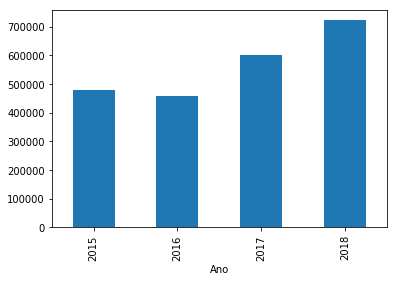

In [15]:
#  usando essa coluna no group by e criando um plot de barra
base.groupby("Ano")["Sales"].sum().plot.bar();

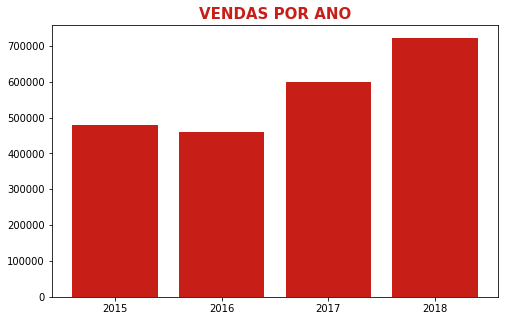

In [16]:
# colocando titulos e editando o grafico 
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(
        figsize = (8,5)
)

ax.set_title("VENDAS POR ANO",
             fontsize=15,
             fontweight="bold",
             color="#c71e18"
)



x = base.groupby("Ano")["Sales"].sum().index
y = base.groupby("Ano")["Sales"].sum().values



ax.bar( x,y , linewidth = 2.0,color ="#c71e18")


ax.xaxis.set_ticks([2015,2016,2017,2018])





plt.show()

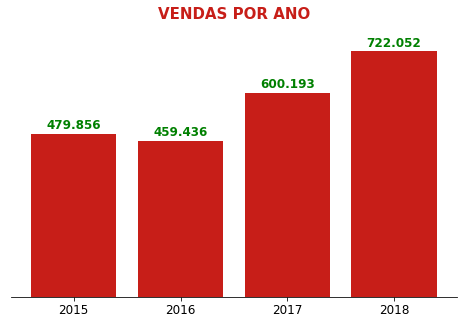

In [17]:
# colocando titulos e editando o grafico 
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(
        figsize = (8,5)
)

soma_ano = base.groupby("Ano")["Sales"].sum()


ax.bar( soma_ano.index,soma_ano.values,
       linewidth = 2.0,
       color ="#c71e18")


ax.set_title("VENDAS POR ANO",
             fontsize=15,
             fontweight="bold",
             color="#c71e18"
)


ax.xaxis.set_ticks([2015,2016,2017,2018])
ax.tick_params(axis="x",labelsize=12)#tamanho do eixo x

for i in range(0,4):
    ax.annotate("{:,.0f}".format(soma_ano.values[i]).replace(",","."),#texto do annotate, farmatando
               (soma_ano.index[i],soma_ano.values[i]),#posiçao(x,y)
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize =12,
                color="green",
                fontweight="bold",
                 
                 )
        
#subir a barra de cima para n ficar colado 
ax.set_yticks([0,800000])
ax.yaxis.set_visible(False)


ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)


plt.show()

In [18]:
#criando coluna do mes 
base["Mes"] = base["Order Date"].dt.month


O método groupby é uma ferramenta essencial para análise de dados, especialmente quando se trata de resumir informações em conjuntos de dados grandes e complexos. Ele permite que você divida, agregue e resuma dados de forma eficiente e conveniente.

In [19]:
# fazendo o groupby agora por mes e ano
soma_mes = base.groupby(["Mes","Ano"])["Sales"].sum()

In [20]:
soma_mes.head()

Mes  Ano 
1    2015    28828.2540
     2016    29347.3864
     2017    38048.1840
     2018    59767.0910
2    2015    12588.4840
Name: Sales, dtype: float64

In [21]:
#transformar indice em coluna 
soma_mes = soma_mes.reset_index()

In [22]:
soma_mes.head()

,Mes,Ano,Sales
0,1,2015,28828.2540
1,1,2016,29347.3864
2,1,2017,38048.1840
3,1,2018,59767.0910
4,2,2015,12588.4840


In [23]:
#agora ficou mais facil de filtrar
soma_mes[soma_mes.Ano == 2015].Sales.values

array([28828.254 , 12588.484 , 54027.692 , 24710.016 , 29520.49  ,
       29181.3346, 35194.558 , 37349.2655, 65956.3998, 34561.947 ,
       64369.4565, 63568.3107])

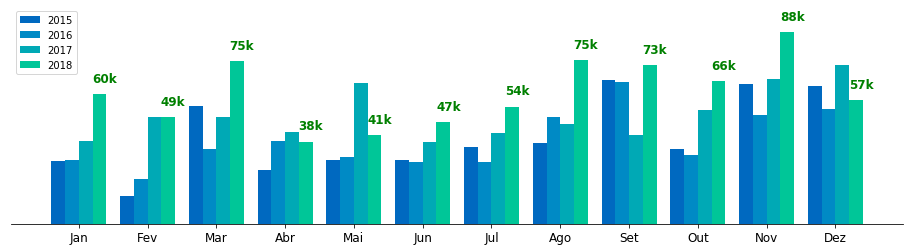

In [116]:
# colocando titulos e editando o grafico 
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(
    figsize = (16,4)
)

wid = 0.2

ax.bar( soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2,
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#0069c0",
       label=2015,
       width=wid
    )
            

ax.bar( soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2,
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color ="#008ac5",
       label=2016,
       width=wid
      )

ax.bar( soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2,
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color ="#00a9b5",
       label=2017,
       width=wid
        )
       
ax.bar( soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2,
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color ="#00c698",
       label=2018,#legenda
       width=wid
      )
ax.legend()# legenda
for i in np.arange(0,12):
    ax.annotate("{:,.0f}k".format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000),#texto do annotate, farmatando
               (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018]
                .Sales.values[i]),#posiçao(x,y)
                ha="center",
                xytext=(5,12),
                textcoords="offset points",
                fontsize =12,
                color="green",
                fontweight="bold"
                 )

 
ax.set_yticks([0,100000])
ax.yaxis.set_visible(False)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13))
teste = ax.set_xticklabels(["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"])
ax.tick_params(axis="x",labelsize=12)#tamanho do eixo x

                     
                     
plt.show()

Qual a categoria mais vendia?

In [25]:
base.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8


In [26]:
#groupby da categoria
base.groupby("Category")["Sales"].sum()

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

In [27]:
#criando a base de categoria por ano
categoria = base.groupby(["Category","Ano"])["Sales"].sum()
#transformando em df para faciolçitar a manipulaçao dos dados 
categoria = categoria.reset_index()

In [28]:
#visualizando as categorias  por ano
categoria[categoria.Category == "Furniture"].Ano.values


array([2015, 2016, 2017, 2018])

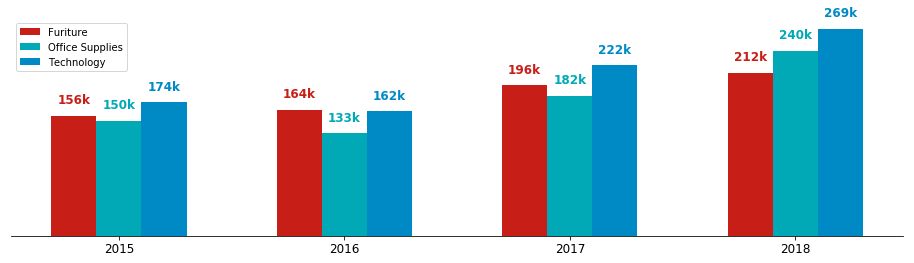

In [29]:
# colocando titulos e editando o grafico 
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(
    figsize = (16,4)
)

wid = 0.2

ax.bar(categoria[categoria.Category == "Furniture"].Ano.values-wid,
       categoria[categoria.Category == "Furniture"].Sales.values,
       color ="#c71e18",
       label="Furiture",
       width=wid
    )
ax.bar(categoria[categoria.Category == "Office Supplies"].Ano.values,
       categoria[categoria.Category == "Office Supplies"].Sales.values,
       color ="#00a9b5",
       label="Office Supplies",
       width=wid
      )
ax.bar(categoria[categoria.Category == "Technology"].Ano.values+wid,
       categoria[categoria.Category == "Technology"].Sales.values,
       color ="#008ac5",
       label="Technology",
       width=wid
      )
       

       
ax.legend()
for i in np.arange(0,4):
    ax.annotate("{:,.0f}k".format(categoria[categoria.Category == "Furniture"].Sales.values[i]/1000),
               (categoria[categoria.Category == "Furniture"].Ano.values[i]-wid,categoria[categoria.Category == "Furniture"].Sales.values[i]),
                ha="center",
                xytext=(0,12),
                textcoords="offset points",
                fontsize =12,
                color="#c71e18",
                fontweight="bold"
                 )
    ax.annotate("{:,.0f}k".format(categoria[categoria.Category == "Office Supplies"].Sales.values[i]/1000),
               (categoria[categoria.Category == "Office Supplies"].Ano.values[i],categoria[categoria.Category ==  "Office Supplies"].Sales.values[i]),
                ha="center",
                xytext=(0,12),
                textcoords="offset points",
                fontsize =12,
                color="#00a9b5",
                fontweight="bold"
                 )
    ax.annotate("{:,.0f}k".format(categoria[categoria.Category == "Technology"].Sales.values[i]/1000),
               (categoria[categoria.Category == "Technology"].Ano.values[i]+wid,categoria[categoria.Category == "Technology"].Sales.values[i]),
                ha="center",
                xytext=(0,12),
                textcoords="offset points",
                fontsize =12,
                color="#008ac5",
                fontweight="bold"
                 )
                      


ax.set_yticks([0,100000])
ax.yaxis.set_visible(False)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
              
                     

ax.xaxis.set_ticks([2015,2016,2017,2018])
ax.tick_params(axis="x",labelsize=12)#tamanho do eixo x
                     
                     
                     
                     
plt.show()

In [30]:
# qual item  mais vendido

In [31]:
base.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8


In [32]:
#podemos fazer um grpoupby do item 
itens = base.groupby("Product Name")["Sales"].sum()
itens = itens.reset_index()
itens = itens.sort_values("Sales",ascending=False)
itens.head(10)

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


In [33]:
#top n itens
n = 8
top_n_itens = itens.head(n)
top_n_itens


,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895


https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html

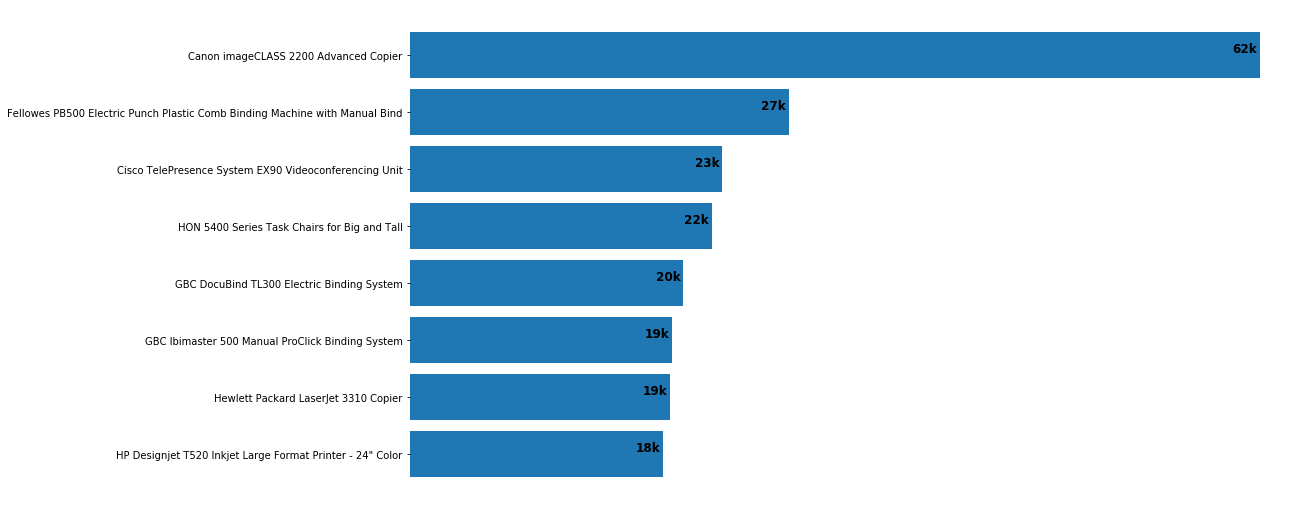

In [34]:
#criando o grafico 
fig, ax = plt.subplots(
    figsize = (16,9)
)

ax.barh(top_n_itens["Product Name"].values,#valolor de y
        top_n_itens["Sales"].values, #valor de x
        align='center')

ax.invert_yaxis()# investindo o eixo y

for i in np.arange(0,n):
    ax.annotate("{:,.0f}k".format(top_n_itens["Sales"].values[i]/1000),
               (top_n_itens["Sales"].values[i],i),
                ha="center",
                xytext=(-15,3),
                textcoords="offset points",
                fontsize =12,
                color="black",
                fontweight="bold"
               )
    
    

ax.xaxis.set_visible(False)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.show()

agrupando item por ano

In [38]:
#groupby de item por ano 
itens_ano = base.groupby(["Product Name","Ano"])["Sales"].sum()
itens_ano = itens_ano.reset_index()
itens_ano.head()


,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502


In [39]:
#visualizar alguns item do top itens
itens_ano [itens_ano["Product Name"]== top_n_itens.iloc[0,0]]

,Product Name,Ano,Sales
1163,Canon imageCLASS 2200 Advanced Copier,2017,25899.926
1164,Canon imageCLASS 2200 Advanced Copier,2018,35699.898


In [68]:
df_datas = pd.DataFrame([2018,2017,2016,2015])
df_datas.columns = ["Ano"]
df_datas

,Ano
0,2018
1,2017
2,2016
3,2015


In [75]:
df_datas["uniao"] = "unir"
itens["uniao"]= "unir"

In [78]:
#definindo o top n itens
n = 10
top_n_itens =  itens.head(n)

In [79]:
df_datas

,Ano,uniao
0,2018,unir
1,2017,unir
2,2016,unir
3,2015,unir


Agora temos uma coluna que conseguimos relacionar, podemos fazer o merge das bases

In [87]:
produto_ano= pd.merge(
    top_n_itens, #primeira base
    df_datas,#segunda base
    how="outer",#tipo de junçao que vamos usar
    on = "uniao" # coluna que vamos usar para fazer essa junçao das base 
)


display(produto_ano.head())

,Product Name,Sales,uniao,Ano
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018


In [88]:
display(itens_ano)

,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502
5,#10 Self-Seal White Envelopes,2018,22.180
6,"#10 White Business Envelopes,4 1/8 x 9 1/2",2015,156.700
7,"#10 White Business Envelopes,4 1/8 x 9 1/2",2016,12.536
8,"#10 White Business Envelopes,4 1/8 x 9 1/2",2017,125.360
9,"#10 White Business Envelopes,4 1/8 x 9 1/2",2018,84.618


In [97]:
itens_ano_grafico= pd.merge(
    produto_ano, #primeira base
    itens_ano,#segunda base
    how="left",#tipo de junçao que vamos usar
    on = ["Product Name","Ano"] # coluna que vamos usar para fazer essa junçao das base 
)


itens_ano_grafico.head()

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742


In [103]:
itens_ano_grafico[itens_ano_grafico.Ano== 2018].Sales_y.values

array([35699.898,  7371.742,       nan,  7220.094, 10943.278,   760.98 ,
        9239.846,       nan,  7077.148,       nan])

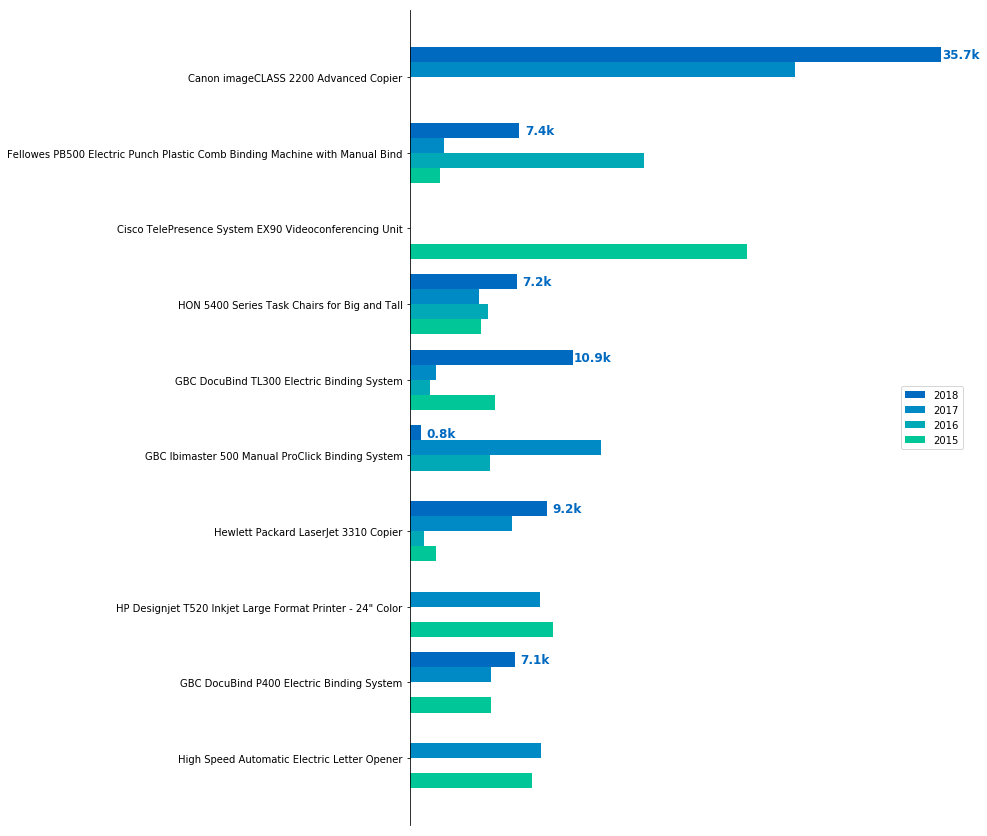

In [154]:
#criando o grafico 
fig, ax = plt.subplots(
    figsize = (10,15)
)


hgt = 0.2 #largura das barras

qtd_itens = len(top_n_itens)



ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2,#valolor de y
        itens_ano_grafico[itens_ano_grafico.Ano== 2018].Sales_y.values, #valor de x
        align='center',
        height=hgt,
        label = 2018,
        color="#0069c0"
       )

ax.barh(np.arange(0,qtd_itens)-hgt/2,#valolor de y
        itens_ano_grafico[itens_ano_grafico.Ano== 2017].Sales_y.values, #valor de x
        align='center',
        height=hgt,
        label = 2017,
        color="#008ac5")

ax.barh(np.arange(0,qtd_itens)+hgt/2,#valolor de y
        itens_ano_grafico[itens_ano_grafico.Ano== 2016].Sales_y.values, #valor de x
        align='center',
        height=hgt,
        label = 2016,
        color="#00a9b5")

ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2,#valolor de y
        itens_ano_grafico[itens_ano_grafico.Ano== 2015].Sales_y.values, #valor de x
        align='center',
        height=hgt,
        label = 2015,
        color="#00c698")

ax.invert_yaxis()# investindo o eixo y
ax.legend()

for i in np.arange(0,qtd_itens):
    ax.annotate("{:,.1f}k".format(itens_ano_grafico[itens_ano_grafico.Ano== 2018].Sales_y.values[i]/1000),
                (itens_ano_grafico[itens_ano_grafico.Ano== 2018].Sales_y.values[i],i-hgt-hgt/2), #valor de x
                ha="center",
                va= "top",
                xytext=(20,6),
                textcoords="offset points",
                fontsize =12,
                color="#0069c0",
                fontweight="bold")

ax.yaxis.set_ticks(np.arange(0,qtd_itens))
ax.set_yticklabels(top_n_itens["Product Name"])
ax.tick_params(axis="y",labelsize=10)#tamanho do eixo x



ax.xaxis.set_visible(False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.show()